In [28]:
import numpy as np
from numpy import pi, cos, sin, log, sqrt, exp
import matplotlib.pyplot as plt
from matplotlib import cm

# Reloading the module
import importlib

import SEM2D_Element
importlib.reload(SEM2D_Element)
from SEM2D_Element import *

import SEM2D_Grid
importlib.reload(SEM2D_Grid)
from SEM2D_Grid import *

import SEM2D_Curve
importlib.reload(SEM2D_Curve)
from SEM2D_Curve import *

import SEM2D_Line
importlib.reload(SEM2D_Line)
from SEM2D_Line import *

import SEM2D_EdgeCommon
importlib.reload(SEM2D_EdgeCommon)
from SEM2D_EdgeCommon import *

import LinearSystem
importlib.reload(LinearSystem)
from LinearSystem import *

import Utilities
importlib.reload(Utilities)
from Utilities import *

# Create elements

In [29]:
element_list = []
scale = 100
c1 = np.array([0, 0.01314]) * scale
c2 = np.array([0, 0.00953]) * scale
c3 = np.array([0.01664, 0.00953]) * scale
c4 = np.array([0.01664, 0.01571]) * scale
c5 = np.array([0.01329, 0.01571]) * scale
c6 = np.array([0.01359, 0.01361])* scale
c7 = np.array([0.0029, 0.01215]) * scale
c8 = np.array([0.00256, 0.01314]) * scale

# Create Element 0

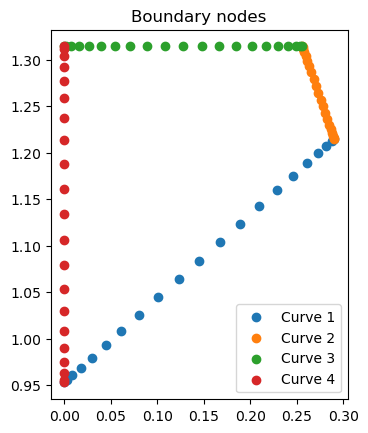

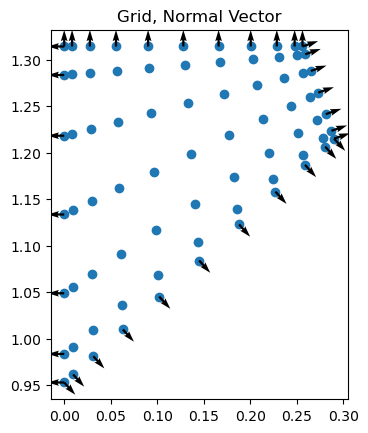

In [30]:
# Corner coordinates
x1 = c2
x2 = c7
x3 = c8
x4 = c1
corners = [x1, x2, x3, x4]

# Curves
# Curve 1
curve1 = Line(20, 'Legendre', x1, x2)
# Curve 2
curve2 = Line(20, 'Legendre', x2, x3)
# Curve 3
curve3 = Line(20, 'Legendre', x4, x3)
# Curve 4
curve4 = Line(20, 'Legendre', x1, x4)

# Collecting the boundary curves
curves = [curve1, curve2, curve3, curve4]
mark_curves = ['common', 'boundary', 'boundary', 'boundary']

# Grid
Nx = 10
Ny = 6
node_type_x = "Legendre"
node_type_y = "Legendre"
grid = Grid(Nx, Ny, node_type_x, node_type_y)

idx = 0
shape = 'quad'
element = Element(idx, shape, grid, curves, corners, mark_curves)

element_list.append(element)

element.visualizing_curves()
element.visualizing_Grid_NormalVector()

# Create element 1

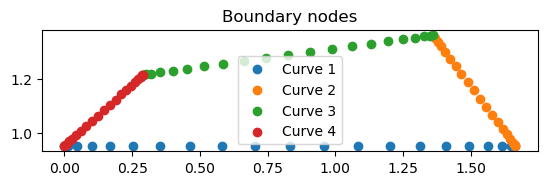

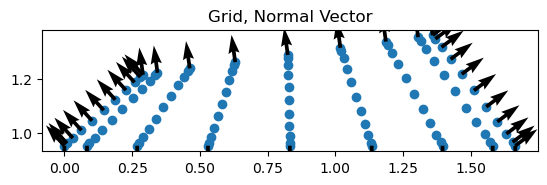

In [31]:
# Corner coordinates
x1 = c2
x2 = c3
x3 = c6
x4 = c7
corners = [x1, x2, x3, x4]

# Curves
# Curve 1
curve1 = Line(20, 'Legendre', x1, x2)
# Curve 2
curve2 = Line(20, 'Legendre', x2, x3)
# Curve 3
curve3 = Line(20, 'Legendre', x4, x3)
# Curve 4
curve4 = Line(20, 'Legendre', x1, x4)

# Collecting the boundary curves
curves = [curve1, curve2, curve3, curve4]
mark_curves = ['boundary', 'common', 'boundary', 'common']

# Grid
Nx = 8
Ny = 10
node_type_x = "Legendre"
node_type_y = "Legendre"
grid = Grid(Nx, Ny, node_type_x, node_type_y)

idx = 1
shape = 'quad'
element = Element(idx, shape, grid, curves, corners, mark_curves)

element_list.append(element)

element.visualizing_curves()
element.visualizing_Grid_NormalVector()


# Create element 2

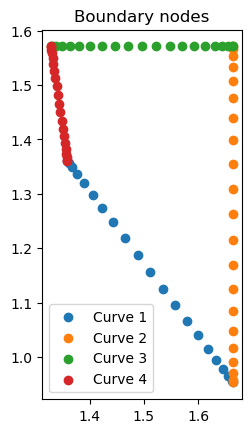

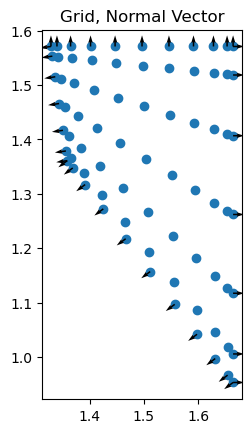

In [32]:
# Corner coordinates
x1 = c6
x2 = c3
x3 = c4
x4 = c5
corners = [x1, x2, x3, x4]

# Curves
# Curve 1
curve1 = Line(20, 'Legendre', x1, x2)
# Curve 2
curve2 = Line(20, 'Legendre', x2, x3)
# Curve 3
curve3 = Line(20, 'Legendre', x4, x3)
# Curve 4
curve4 = Line(20, 'Legendre', x1, x4)

# Collecting the boundary curves
curves = [curve1, curve2, curve3, curve4]
mark_curves = ['common', 'boundary', 'boundary', 'boundary']

# Grid
Nx = 10
Ny = 6
node_type_x = "Legendre"
node_type_y = "Legendre"
grid = Grid(Nx, Ny, node_type_x, node_type_y)

idx = 2
shape = 'quad'
element = Element(idx, shape, grid, curves, corners, mark_curves)

element_list.append(element)

element.visualizing_curves()
element.visualizing_Grid_NormalVector()


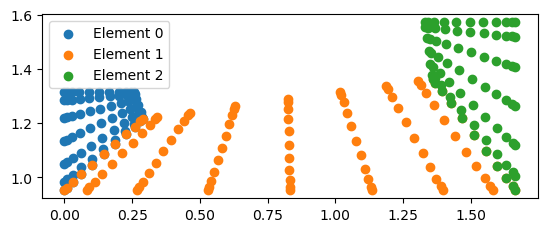

In [33]:
# Showing all elements
visualizing_all(element_list)

# Create common edges

In [34]:
edgecommon_list = []
idx = 0
element_info = [(element_list[0], 1, 1), (element_list[1], 4, 1)]
edgecommon = EdgeCommon(idx, element_info)
edgecommon_list.append(edgecommon)

idx = 1
element_info = [(element_list[1], 2, 1), (element_list[2], 1, -1)]
edgecommon = EdgeCommon(idx, element_info)
edgecommon_list.append(edgecommon)

Compatible
Compatible


# Construct and solve the linear system

# Test 1

In [35]:
# Set up the exact solution, source, right-hand side
func_ux, func_uy = set_Uth_S_RHS_ver4(element_list)
# Set up BC
# Element0, Dirichlet
e = element_list[0]
set_BC_BoundaryInnerNodes(e, func_ux, func_uy, alpha=1, beta=0)
set_BC_CornerNodes(e)

# Element1, curve 1 Neumann
e = element_list[1]
alpha = [0,1,1,1]
beta = [1,0,0,0]
set_BC_BoundaryInnerNodes(e, func_ux, func_uy, alpha, beta)
set_BC_CornerNodes(e)

# Element2, Dirichlet
e = element_list[2]
set_BC_BoundaryInnerNodes(e, func_ux, func_uy, alpha=1, beta=0)
set_BC_CornerNodes(e)

Abs error 2.8601387924709343e-09
Rel error 2.1167249104593319e-10


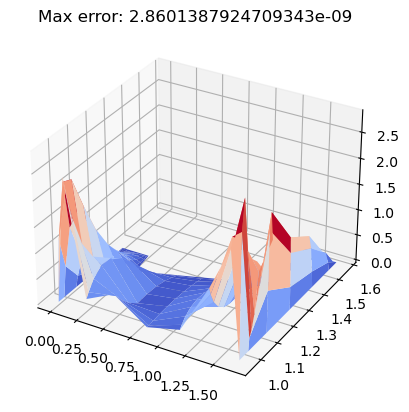

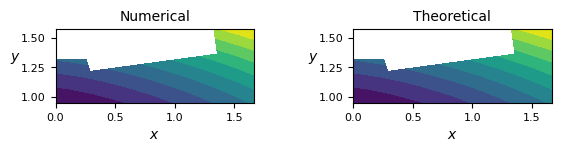

In [36]:
# Equations for inner nodes
C, d, ind_1st = MatEqnConverter_Collocation_InnerNodes(element_list)
# Equations for nodes on common edges
C, d, ind_1st = MatEqnConverter_Collocation_Patching(edgecommon_list, element_list, C, d, ind_1st)
# Equations for boundary inner nodes
C, d, ind_1st = MatEqnConverter_Collocation_BC(element_list, C, d, ind_1st)
# Equations for corner nodes
C, d, ind_1st = MatEqnConverter_Corner(element_list, C, d, ind_1st)
# Solve the system
MatEqnSolver_NonsquareCollocation(C, d, element_list)
# Visualization of error
visualization_error(element_list)
# Visualization of the solution
visualization_solution_2Dcontour(element_list)

# Max abs error
error_max_list = []
for element in element_list:
    error_max_list.append( np.max(np.abs(element.U - element.U_th)) )
err_maxabs = np.max(error_max_list)
print('Abs error', err_maxabs)
U_maxabs = np.max(np.abs(element.U))
err_maxabs_rel = err_maxabs / U_maxabs
print('Rel error', err_maxabs_rel)

# Test 2

In [37]:
# Set up the exact solution, source, right-hand side
func_ux, func_uy = set_Uth_S_RHS_ver4(element_list)
# Set up BC
# Element0, curve 2,3,4 Neumann
e = element_list[0]
alpha = 0
beta = 1
set_BC_BoundaryInnerNodes(e, func_ux, func_uy, alpha, beta)
set_BC_CornerNodes(e)

# Element1, Dirichlet
e = element_list[1]
alpha = 1
beta = 0
set_BC_BoundaryInnerNodes(e, func_ux, func_uy, alpha, beta)
set_BC_CornerNodes(e)

# Element2, Dirichlet
e = element_list[2]
alpha = 1
beta = 0
set_BC_BoundaryInnerNodes(e, func_ux, func_uy, alpha, beta)
set_BC_CornerNodes(e)

Abs error 2.149181277388834e-09
Rel error 1.5905611150470012e-10


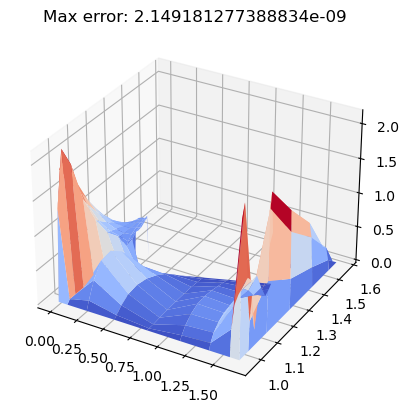

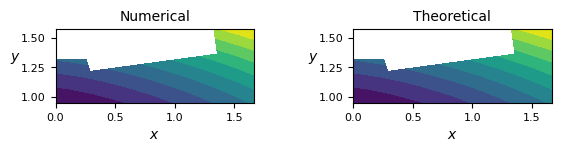

In [38]:
# Equations for inner nodes
C, d, ind_1st = MatEqnConverter_Collocation_InnerNodes(element_list)
# Equations for nodes on common edges
C, d, ind_1st = MatEqnConverter_Collocation_Patching(edgecommon_list, element_list, C, d, ind_1st)
# Equations for boundary inner nodes
C, d, ind_1st = MatEqnConverter_Collocation_BC(element_list, C, d, ind_1st)
# Equations for corner nodes
C, d, ind_1st = MatEqnConverter_Corner(element_list, C, d, ind_1st)
# Solve the system
MatEqnSolver_NonsquareCollocation(C, d, element_list)
# Visualization of error
visualization_error(element_list)
# Visualization of the solution
visualization_solution_2Dcontour(element_list)

# Max abs error
error_max_list = []
for element in element_list:
    error_max_list.append( np.max(np.abs(element.U - element.U_th)) )
err_maxabs = np.max(error_max_list)
print('Abs error', err_maxabs)
U_maxabs = np.max(np.abs(element.U))
err_maxabs_rel = err_maxabs / U_maxabs
print('Rel error', err_maxabs_rel)

# Test 3

In [39]:
# Set up the exact solution, source, right-hand side
func_ux, func_uy = set_Uth_S_RHS_ver4(element_list)
# Set up BC
# Element0, Dirichlet
e = element_list[0]
alpha = 1
beta = 0
set_BC_BoundaryInnerNodes(e, func_ux, func_uy, alpha, beta)
set_BC_CornerNodes(e)

# Element1, curve 1, 3 Neumann
e = element_list[1]
alpha = 0
beta = 1
set_BC_BoundaryInnerNodes(e, func_ux, func_uy, alpha, beta)
set_BC_CornerNodes(e)

# Element2, Dirichlet
e = element_list[2]
alpha = 1
beta = 0
set_BC_BoundaryInnerNodes(e, func_ux, func_uy, alpha, beta)
set_BC_CornerNodes(e)

Abs error 2.896427986343042e-09
Rel error 2.1435817332302356e-10


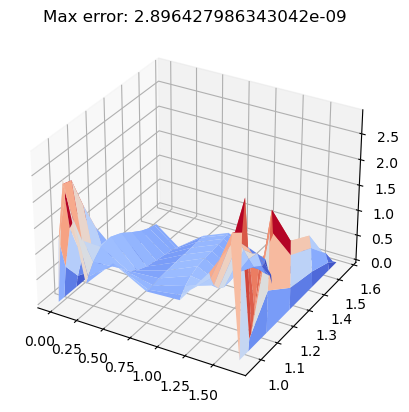

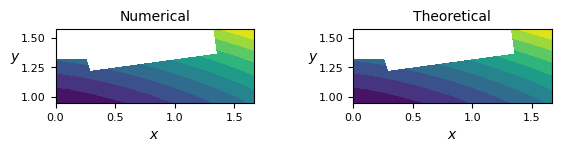

In [40]:
# Equations for inner nodes
C, d, ind_1st = MatEqnConverter_Collocation_InnerNodes(element_list)
# Equations for nodes on common edges
C, d, ind_1st = MatEqnConverter_Collocation_Patching(edgecommon_list, element_list, C, d, ind_1st)
# Equations for boundary inner nodes
C, d, ind_1st = MatEqnConverter_Collocation_BC(element_list, C, d, ind_1st)
# Equations for corner nodes
C, d, ind_1st = MatEqnConverter_Corner(element_list, C, d, ind_1st)
# Solve the system
MatEqnSolver_NonsquareCollocation(C, d, element_list)
# Visualization of error
visualization_error(element_list)
# Visualization of the solution
visualization_solution_2Dcontour(element_list)

# Max abs error
error_max_list = []
for element in element_list:
    error_max_list.append( np.max(np.abs(element.U - element.U_th)) )
err_maxabs = np.max(error_max_list)
print('Abs error', err_maxabs)
U_maxabs = np.max(np.abs(element.U))
err_maxabs_rel = err_maxabs / U_maxabs
print('Rel error', err_maxabs_rel)

# Test 4


In [41]:
# Set up the exact solution, source, right-hand side
func_ux, func_uy = set_Uth_S_RHS_ver4(element_list)
# Set up BC
# Element0, Dirichlet
e = element_list[0]
alpha = 1
beta = 0
set_BC_BoundaryInnerNodes(e, func_ux, func_uy, alpha, beta)
set_BC_CornerNodes(e)

# Element1, Dirichlet
e = element_list[1]
alpha = 1
beta = 0
set_BC_BoundaryInnerNodes(e, func_ux, func_uy, alpha, beta)
set_BC_CornerNodes(e)

# Element2, Curve 2,3,4 Neumann
e = element_list[2]
alpha = 0
beta = 1
set_BC_BoundaryInnerNodes(e, func_ux, func_uy, alpha, beta)
set_BC_CornerNodes(e)

Abs error 5.339064124143533e-08
Rel error 3.951322243474378e-09


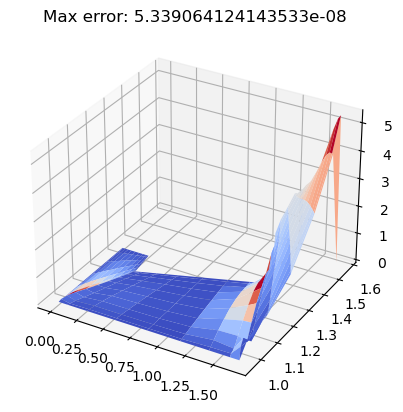

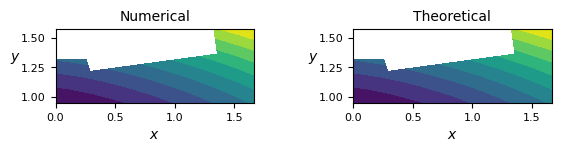

In [42]:
# Equations for inner nodes
C, d, ind_1st = MatEqnConverter_Collocation_InnerNodes(element_list)
# Equations for nodes on common edges
C, d, ind_1st = MatEqnConverter_Collocation_Patching(edgecommon_list, element_list, C, d, ind_1st)
# Equations for boundary inner nodes
C, d, ind_1st = MatEqnConverter_Collocation_BC(element_list, C, d, ind_1st)
# Equations for corner nodes
C, d, ind_1st = MatEqnConverter_Corner(element_list, C, d, ind_1st)
# Solve the system
MatEqnSolver_NonsquareCollocation(C, d, element_list)
# Visualization of error
visualization_error(element_list)
# Visualization of the solution
visualization_solution_2Dcontour(element_list)

# Max abs error
error_max_list = []
for element in element_list:
    error_max_list.append( np.max(np.abs(element.U - element.U_th)) )
err_maxabs = np.max(error_max_list)
print('Abs error', err_maxabs)
U_maxabs = np.max(np.abs(element.U))
err_maxabs_rel = err_maxabs / U_maxabs
print('Rel error', err_maxabs_rel)

# Test 5

In [43]:
# Set up the exact solution, source, right-hand side
func_ux, func_uy = set_Uth_S_RHS_ver4(element_list)
# Set up BC
# Element0, Robin
e = element_list[0]
alpha = 1
beta = 1
set_BC_BoundaryInnerNodes(e, func_ux, func_uy, alpha, beta)
set_BC_CornerNodes(e)

# Element1, Robin
e = element_list[1]
alpha = 1
beta = 1
set_BC_BoundaryInnerNodes(e, func_ux, func_uy, alpha, beta)
set_BC_CornerNodes(e)

# Element2, Robin
e = element_list[2]
alpha = 1
beta = 1
set_BC_BoundaryInnerNodes(e, func_ux, func_uy, alpha, beta)
set_BC_CornerNodes(e)

Abs error 3.369803458497245e-08
Rel error 2.493916359139629e-09


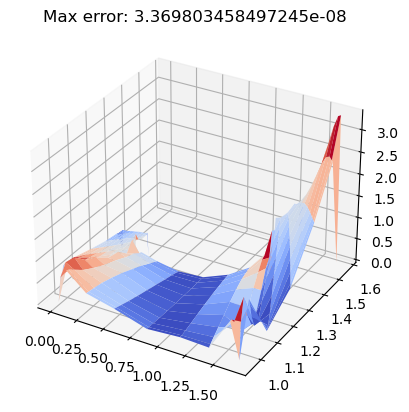

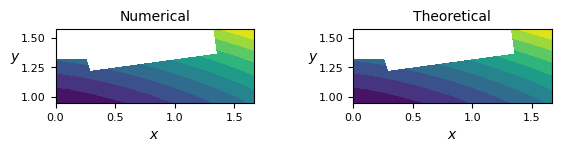

In [44]:
# Equations for inner nodes
C, d, ind_1st = MatEqnConverter_Collocation_InnerNodes(element_list)
# Equations for nodes on common edges
C, d, ind_1st = MatEqnConverter_Collocation_Patching(edgecommon_list, element_list, C, d, ind_1st)
# Equations for boundary inner nodes
C, d, ind_1st = MatEqnConverter_Collocation_BC(element_list, C, d, ind_1st)
# Equations for corner nodes
C, d, ind_1st = MatEqnConverter_Corner(element_list, C, d, ind_1st)
# Solve the system
MatEqnSolver_NonsquareCollocation(C, d, element_list)
# Visualization of error
visualization_error(element_list)
# Visualization of the solution
visualization_solution_2Dcontour(element_list)

# Max abs error
error_max_list = []
for element in element_list:
    error_max_list.append( np.max(np.abs(element.U - element.U_th)) )
err_maxabs = np.max(error_max_list)
print('Abs error', err_maxabs)
U_maxabs = np.max(np.abs(element.U))
err_maxabs_rel = err_maxabs / U_maxabs
print('Rel error', err_maxabs_rel)